#### Challenge Set 3  

**Topic:** Linear Regression and Train/Test Split  
**Date:** 17 October 2016  
**Name:** Ron Olshansky-Lucero  

In [257]:
# Python 2/3 compatibility
from __future__ import print_function, division

#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
from datetime import datetime

%matplotlib inline

In [258]:
data_path = 'data/2013_movies.csv'
df = pd.read_csv(data_path)

In [259]:
df.info() # need to drop null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [260]:
df.dropna(inplace = True)
df.info() # dropped 13 observations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 99
Data columns (total 7 columns):
Title                 87 non-null object
Budget                87 non-null float64
DomesticTotalGross    87 non-null int64
Director              87 non-null object
Rating                87 non-null object
Runtime               87 non-null int64
ReleaseDate           87 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.4+ KB


#### Exercise 3.1  

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross).

How can you interpret the results of this model? What does it predict?

Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [261]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [262]:
# predict DomesticTotalGross with a constant term
df['Constant'] = 1
X1 = df['Constant']
y1 = df['DomesticTotalGross']

In [263]:
# model1 (null model with only constant term)
model1 = sm.OLS(y1, X1)
fit1 = model1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sat, 15 Oct 2016   Prob (F-statistic):                nan
Time:                        22:08:10   Log-Likelihood:                -1714.4
No. Observations:                  87   AIC:                             3431.
Df Residuals:                      86   BIC:                             3433.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant    1.035e+08   9.43e+06     10.975      0.0

In [264]:
y1.mean() # 103,515,275.64367816

103515275.64367816

In [265]:
# generate predicted values and residuals
y1_pred = fit1.predict(X1)
resid1 = fit1.resid

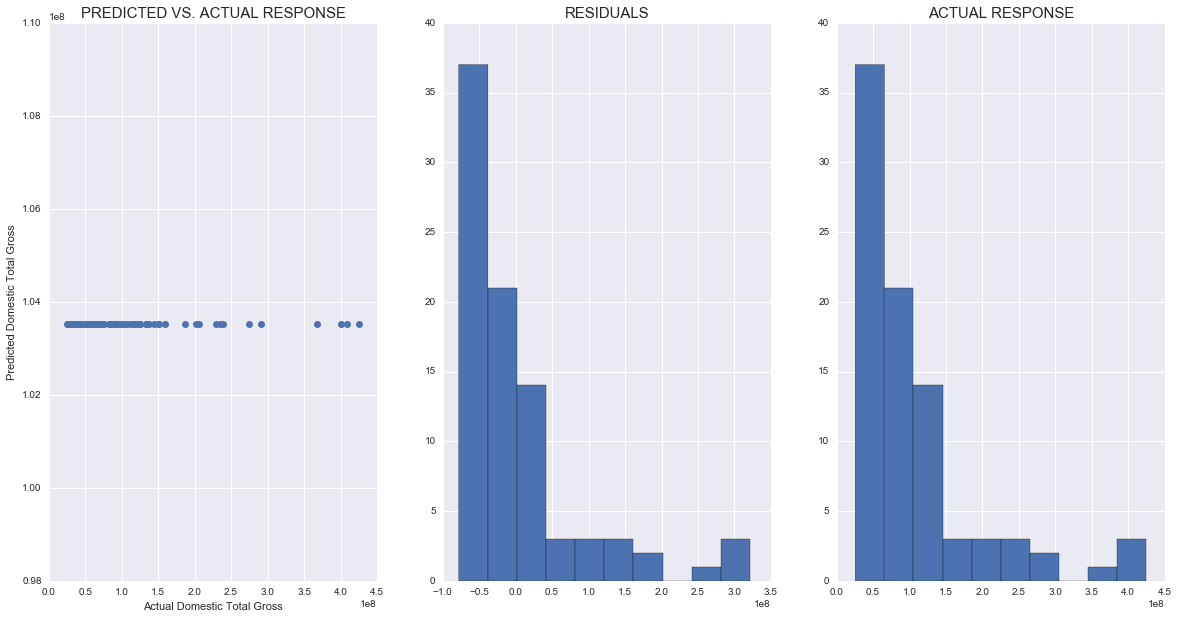

In [266]:
plt.figure(figsize = (20, 10))

# plot predicted vs actual y values
plt.subplot(1, 3, 1)
plt.title('PREDICTED VS. ACTUAL RESPONSE', fontsize = 15)
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.plot(y1, y1_pred, 'o')

# plot histogram of residuals
plt.subplot(1, 3, 2)
plt.title('RESIDUALS', fontsize = 15)
plt.hist(resid1)

# plot histogram of actual values
plt.subplot(1, 3, 3)
plt.title('ACTUAL RESPONSE', fontsize = 15)
plt.hist(y1);

A regression model with only a constant/intercept term (also known as a 'null' model) is basically the same as computing the mean of the response variable.

The intercept can be interpreted as the expected mean value of y when all other predictors (Xs) are zero (hence the term 'null' model).

In fact, the value of the intercept is equal to the mean of y in this model, which is approximately $103 million (rounded). This is demonstrated visually in the plot of predicted vs. actual values of the response. The plot shows a horizontal line at approximately y = 1.03 million, which is the mean of the response. 

Consequently, the R^2 and adjusted R^2 are essentially zero, because the model does not take into account any other data but the response variable. This means that the variation in y is being explained only by y itself. Hence the model cannot explain any of the variation in the response data.

Since the model is merely computing the mean of the response variable, the distribution of the residuals is identical to the distribution of the response variable, as can be seen in the histograms above (center and right figure).


#### Exercise 3.2

Repeat the process above, but also add one continuous (numeric) predictor variable.

Also add plots of model prediction against your feature variable (predicted vs predictor) and residuals against feature variable.

How can you interpret what's happening in the model?

In [267]:
# model2 (one numeric predictor)
y2 = y1
X2 = df[['Constant','Budget']]

In [268]:
model2 = sm.OLS(y2, X2)
fit2 = model2.fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     33.43
Date:                Sat, 15 Oct 2016   Prob (F-statistic):           1.19e-07
Time:                        22:08:10   Log-Likelihood:                -1700.0
No. Observations:                  87   AIC:                             3404.
Df Residuals:                      85   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant    4.443e+07    1.3e+07      3.418      0.0

In [269]:
# generate predicted values and residuals
y2_pred = fit2.predict(X2)
resid2 = fit2.resid

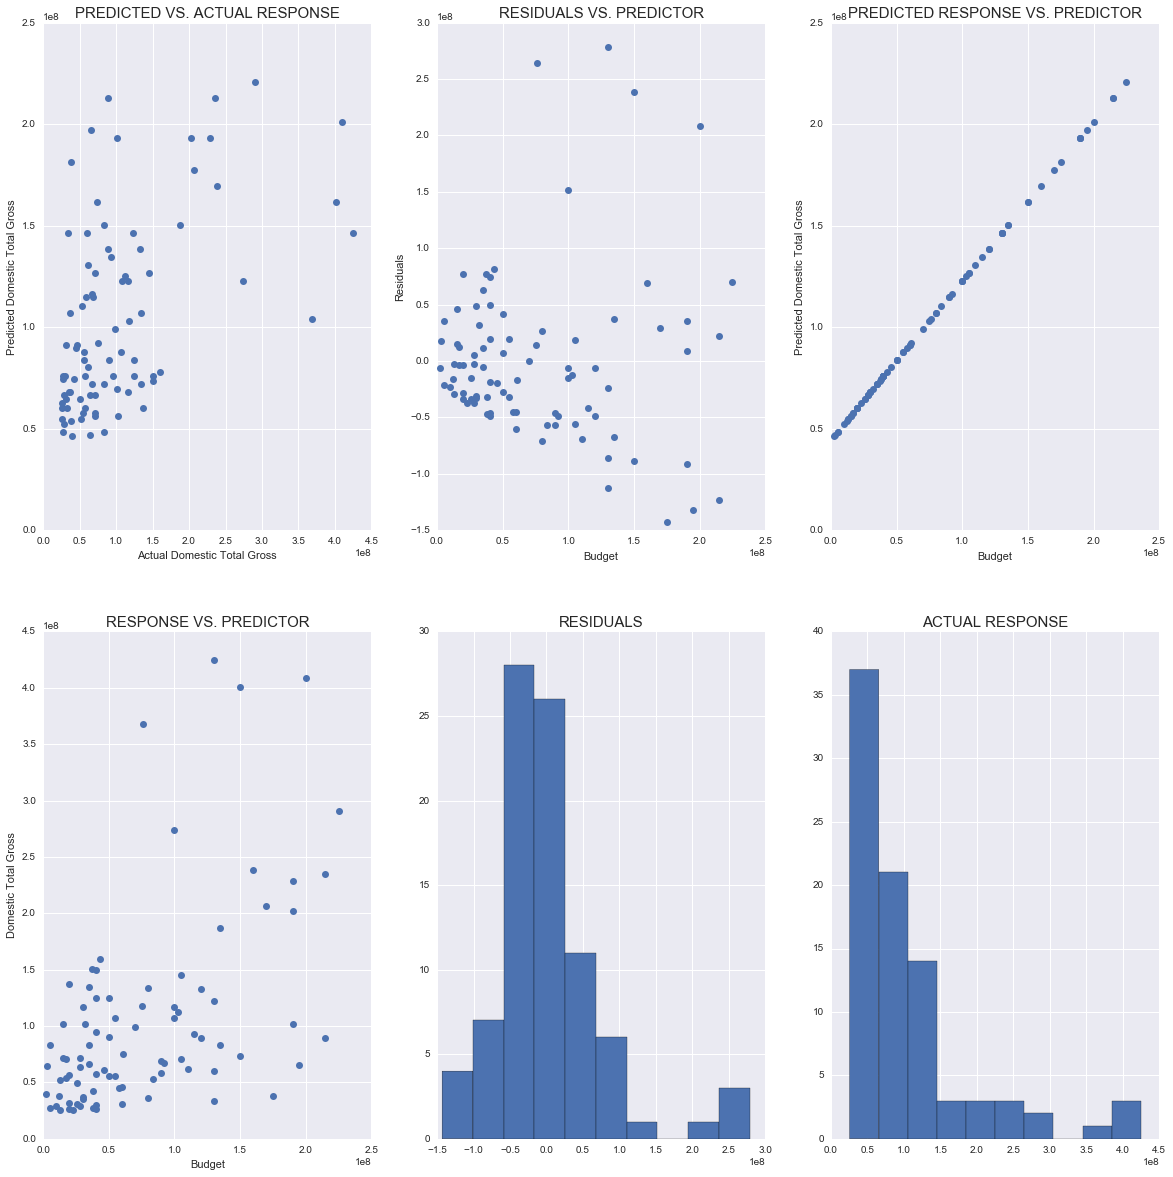

In [270]:
plt.figure(figsize = (20, 20))

# plot predicted vs actual y values
plt.subplot(2, 3, 1)
plt.title('PREDICTED VS. ACTUAL RESPONSE', fontsize = 15)
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.plot(y2, y2_pred, 'o')

# plot residuals vs predictor (budget)
plt.subplot(2, 3, 2)
plt.title('RESIDUALS VS. PREDICTOR', fontsize = 15)
plt.xlabel('Budget')
plt.ylabel('Residuals')
plt.plot(X2['Budget'], resid2, 'o')

# plot predicted values vs predictor (budget)
plt.subplot(2, 3, 3)
plt.title('PREDICTED RESPONSE VS. PREDICTOR', fontsize = 15)
plt.xlabel('Budget')
plt.ylabel('Predicted Domestic Total Gross')
plt.plot(X2['Budget'], y2_pred, 'o')

# plot response vs predictor (budget)
plt.subplot(2, 3, 4)
plt.title('RESPONSE VS. PREDICTOR', fontsize = 15)
plt.xlabel('Budget')
plt.ylabel('Domestic Total Gross')
plt.plot(X2['Budget'], y2, 'o')

# plot histogram of residuals
plt.subplot(2, 3, 5)
plt.title('RESIDUALS', fontsize = 15)
plt.hist(resid2)

# plot histogram of actual values
plt.subplot(2, 3, 6)
plt.title('ACTUAL RESPONSE', fontsize = 15)
plt.hist(y2);

The second model is definitely an improvement on the first (null) model. The adjusted R^2 of 0.274 means that the added predictor, `Budget`, is able to explain about 27% of the variation in the response variable, `DomesticTotalGross`, compared to the null model.

Although adding a predictor helps, the model suffers from nonconstant variance (heteroscedasticity), as can be seen in the first two plots:

- predicted vs actual response
- residuals vs predictor (budget)

The first plot shows that while there appears to be a somehwat linear relationship between the predicted and actual `DomesticTotalGross` values, the dispersion of the data points tends to get worse as the actual `DomesticTotalGross` values increase, which means that the predictive power of the model gets worse for observations where the value of the response `DomesticTotalGross` is larger than a certain value (above $3 million, in this case). This likely has to do with the fact that there might be two different groups of films, which can be seen in the histogram of the actual response variable (last plot).

The nonconstant variance can also be seen in the plot of residuals against the predictor, which shows that the errors tend to get worse for larger values of the predictor `Budget`. The histogram of residuals also points to the possibility of two different groups of films, since the residuals tend to be almost normally distributed for most of the films, except for a a much smaller group.

Finally, a plot of `DomesticTotalGross` against the predictor `Budget`  (bottom left) again points to a weaker relationship for larger values of both variables.

#### Exercise 3.3

Repeat the process from 3.1, but add a categorical feature. You'll have to convert a column of text into a number of numerical columns ('dummy variables').

How can you interpret what's happening in the model?

In [271]:
# model3 (categorical feature)
# - turn levels into features
# df.Rating.unique() # ['PG-13', 'PG', 'R']
y3 = y1
X3 = pd.get_dummies(df['Rating'])
X3 = sm.add_constant(X3) # alternative to adding a column of 1s to df
X3.head()

,const,PG,PG-13,R
0,1,0.0,1.0,0.0
1,1,0.0,1.0,0.0
2,1,1.0,0.0,0.0
3,1,1.0,0.0,0.0
4,1,0.0,1.0,0.0


In [272]:
model3 = sm.OLS(y3, X3)
fit3 = model3.fit()
print(fit3.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.242
Date:                Sat, 15 Oct 2016   Prob (F-statistic):             0.0440
Time:                        22:08:12   Log-Likelihood:                -1711.2
No. Observations:                  87   AIC:                             3428.
Df Residuals:                      84   BIC:                             3436.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8.098e+07   7.63e+06     10.609      0.0

In [273]:
# generate predicted values and residuals
y3_pred = fit3.predict(X3)
resid3 = fit3.resid

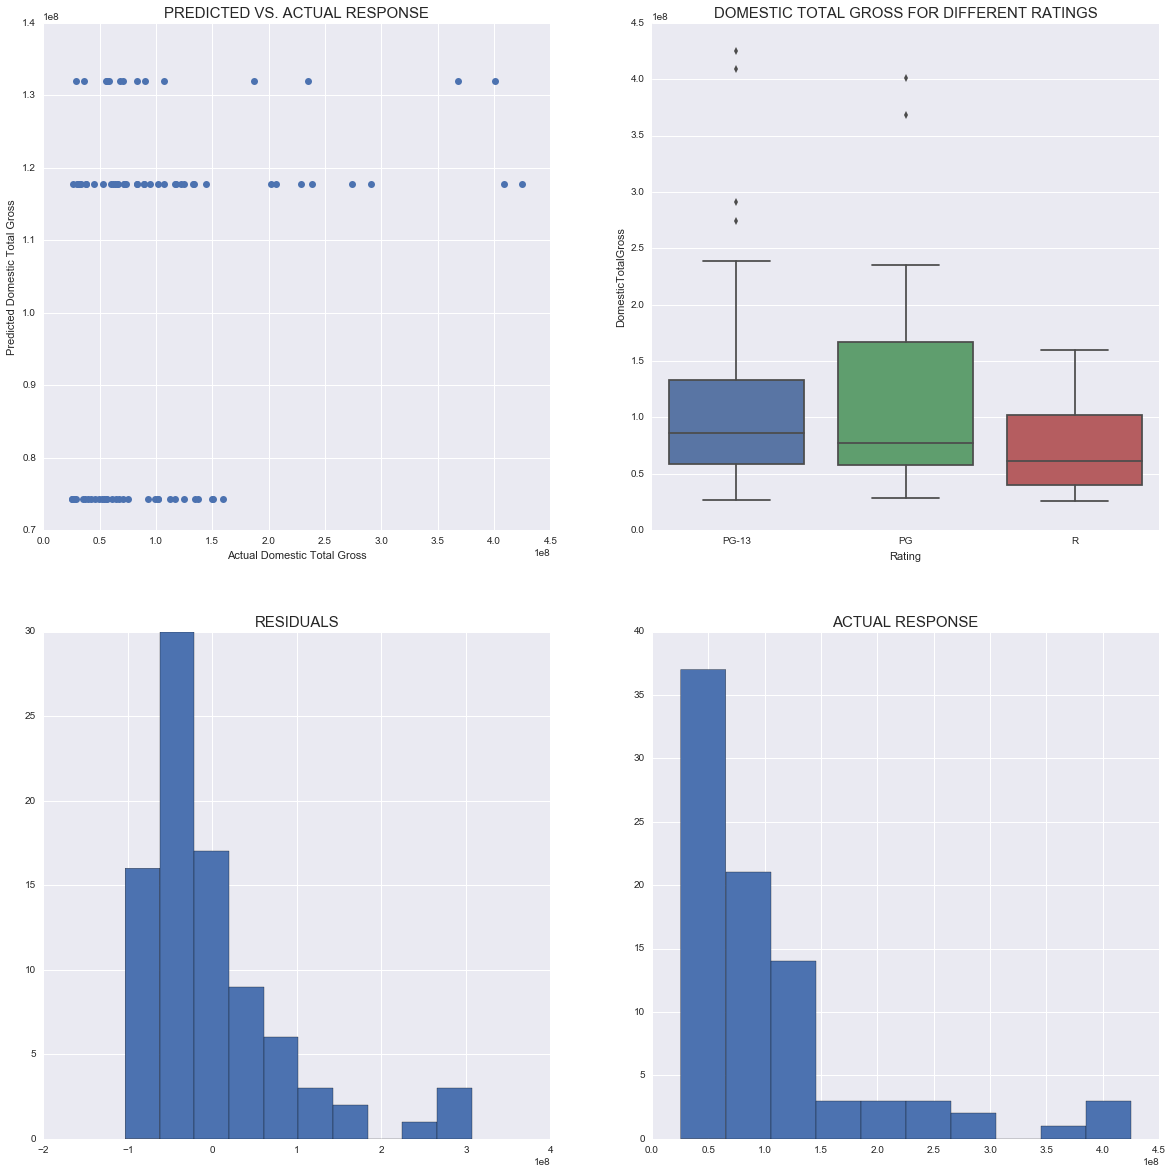

In [274]:
plt.figure(figsize = (20, 20))

# plot predicted vs actual y values
plt.subplot(2, 2, 1)
plt.title('PREDICTED VS. ACTUAL RESPONSE', fontsize = 15)
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.plot(y3, y3_pred, 'o')

plt.subplot(2, 2, 2)
plt.title('DOMESTIC TOTAL GROSS FOR DIFFERENT RATINGS', fontsize = 15)
sns.boxplot(x = df['Rating'], y = df['DomesticTotalGross'])

# plot histogram of residuals
plt.subplot(2, 2, 3)
plt.title('RESIDUALS', fontsize = 15)
plt.hist(resid3)

# plot histogram of actual values
plt.subplot(2, 2, 4)
plt.title('ACTUAL RESPONSE', fontsize = 15)
plt.hist(y3);

The model with only categorical predictors and a constant term performs considerably worse.

This model is basically a variation on ANOVA, and is effectively merely computing differences in group means, where the groups are the levels of `Rating` (PG, PG-13, R).

The distribution of the residuals are not that different from the distribution of the response variable (as can be seen in the histograms).

#### Exercise 3.4

Enhance your model further by adding more features and/or transforming existing features. This about how you build the model matrix and how to interpret what the model is doing.

In [275]:
df = df.drop('Constant', axis=1)
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [276]:
# scale to millions
df['DomesticTotalGross'] = df.DomesticTotalGross/1000000
df['Budget'] = df.Budget/1000000

In [277]:
# DomesticTotalGross varies considerably by rating
# - good candidate for dummy variable
(df
.groupby('Rating')
.DomesticTotalGross
.mean()
.sort_values(ascending=False))

Rating
PG       131.945870
PG-13    117.726612
R         74.227949
Name: DomesticTotalGross, dtype: float64

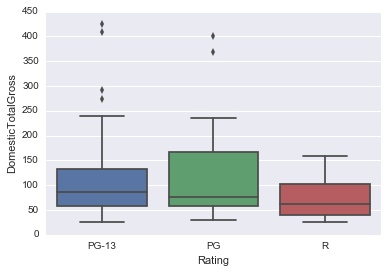

In [278]:
sns.boxplot(x=df['Rating'], y = df['DomesticTotalGross'])

In [279]:
# construct dummy variables for ratings
rtg = pd.get_dummies(df['Rating'])
df = pd.concat([df,rtg], axis = 1)

In [280]:
# cast ReleaseDate as datetime object
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [281]:
# extract Month
df['Month'] = df['ReleaseDate'].dt.month

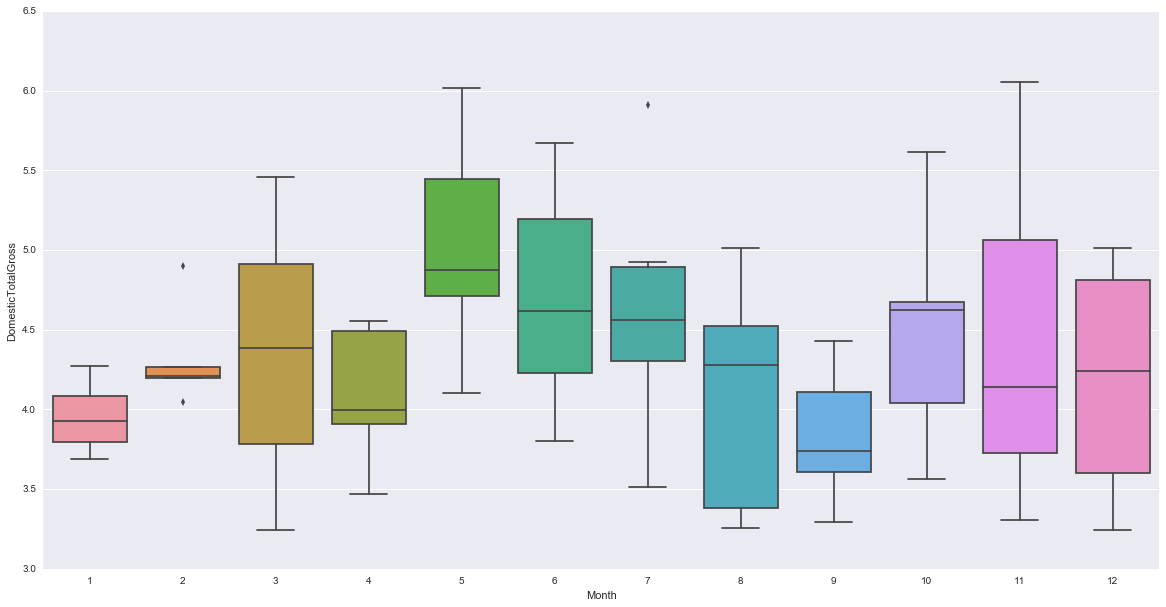

In [282]:
plt.figure(figsize = (20,10))
sns.boxplot(x = df['Month'], y = np.log(df['DomesticTotalGross']))

In [283]:
# construct a `Season` variable

df['Summer'] = 0
df['Holiday'] = 0
df['Offseason'] = 0

df['Summer'] = df.Month.map(lambda x: 1 if (5 <= x <= 7) else 0)
df['Holiday'] = df.Month.map(lambda x: 1 if x in [11,12] else 0)
df['Offseason'] = df.Month.map(lambda x: 1 if x in [1,2,3,4,8,9,10] else 0)

In [284]:
# dataframe for model4
features = ['DomesticTotalGross','Budget','Runtime',
            'PG','PG-13','R','Summer','Holiday','Offseason']
df4 = df[features]
df4.head()

,DomesticTotalGross,Budget,Runtime,PG,PG-13,R,Summer,Holiday,Offseason
0,424.668047,130.0,146,0.0,1.0,0.0,0,1,0
1,409.013994,200.0,129,0.0,1.0,0.0,1,0,0
2,400.738009,150.0,108,1.0,0.0,0.0,0,1,0
3,368.061265,76.0,98,1.0,0.0,0.0,1,0,0
4,291.045518,225.0,143,0.0,1.0,0.0,1,0,0


In [285]:
(df4
 .corr()['DomesticTotalGross']
#  .abs()
 .sort_values(ascending=False))

DomesticTotalGross    1.000000
Budget                0.531319
Summer                0.282216
Runtime               0.265719
PG-13                 0.149891
PG                    0.142347
Holiday               0.030513
R                    -0.261758
Offseason            -0.281266
Name: DomesticTotalGross, dtype: float64

`DomesticTotalGross` seems to be most correlated with `Budget`, followed by features indicating rating and seasonality.

Based on visual exploration earlier, `Summer` release and `PG` rating seem to have higher `DomesticTotalGross` relative to the other levels. Let's use these as the reference levels.

Let's consider a model with the following features:

- `Budget`
- `Runtime`
- `PG-13` (difference from `PG` rated films, the reference level)
- `R` (difference from `PG` rated films, the reference level)
- `Holiday` (difference from `Summer`, the reference level)
- `Offseason` (difference from `Summer`, the reference level)


In [286]:
# model4
y4 = np.log(df4['DomesticTotalGross'])
predictors = ['Budget','Runtime','PG-13','R','Holiday','Offseason']
X4 = df4[predictors]
X4 = sm.add_constant(X4)
X4.head()

,const,Budget,Runtime,PG-13,R,Holiday,Offseason
0,1,130.0,146,1.0,0.0,1,0
1,1,200.0,129,1.0,0.0,0,0
2,1,150.0,108,0.0,0.0,1,0
3,1,76.0,98,0.0,0.0,0,0
4,1,225.0,143,1.0,0.0,0,0


In [287]:
model4 = sm.OLS(y4, X4)
fit4 = model4.fit()
print(fit4.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     6.657
Date:                Sat, 15 Oct 2016   Prob (F-statistic):           9.70e-06
Time:                        22:08:14   Log-Likelihood:                -76.229
No. Observations:                  87   AIC:                             166.5
Df Residuals:                      80   BIC:                             183.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.5917      0.453      7.933      0.0

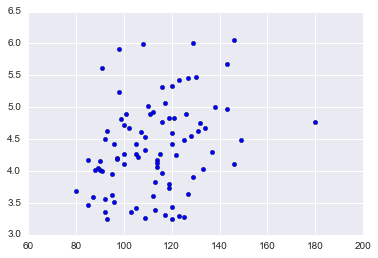

In [288]:
plt.scatter(df4['Runtime'],np.log(df4['DomesticTotalGross']))

In [289]:
# model 4b
# - drop features related to ratings
y4b = np.log(df4['DomesticTotalGross'])
predictors = ['Budget','Runtime','Holiday','Offseason']
X4b = df4[predictors]
X4b = sm.add_constant(X4b)
X4b.head()

,const,Budget,Runtime,Holiday,Offseason
0,1,130.0,146,1,0
1,1,200.0,129,0,0
2,1,150.0,108,1,0
3,1,76.0,98,0,0
4,1,225.0,143,0,0


In [290]:
model4b = sm.OLS(y4b, X4b)
fit4b = model4b.fit()
print(fit4b.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     9.783
Date:                Sat, 15 Oct 2016   Prob (F-statistic):           1.61e-06
Time:                        22:08:14   Log-Likelihood:                -76.874
No. Observations:                  87   AIC:                             163.7
Df Residuals:                      82   BIC:                             176.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.5870      0.450      7.963      0.0

In [291]:
# model 4c
# - drop features related to seasonality
# - keep only const and Budget
y4c = np.log(df4['DomesticTotalGross'])
predictors = ['Budget','Runtime']
X4c = df4[predictors]
X4c = sm.add_constant(X4c)
X4c.head()

,const,Budget,Runtime
0,1,130.0,146
1,1,200.0,129
2,1,150.0,108
3,1,76.0,98
4,1,225.0,143


In [292]:
model4c = sm.OLS(y4c, X4c)
fit4c = model4c.fit()
print(fit4c.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     18.60
Date:                Sat, 15 Oct 2016   Prob (F-statistic):           2.05e-07
Time:                        22:08:14   Log-Likelihood:                -77.897
No. Observations:                  87   AIC:                             161.8
Df Residuals:                      84   BIC:                             169.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.3942      0.421      8.054      0.0

In [293]:
# model 4d
# - keep only Budget as predictor
y4d = np.log(df4['DomesticTotalGross'])
predictors = ['Budget']
X4d = df4[predictors]
X4d = sm.add_constant(X4d)
X4d.head()

,const,Budget
0,1,130.0
1,1,200.0
2,1,150.0
3,1,76.0
4,1,225.0


In [294]:
model4d = sm.OLS(y4d, X4d)
fit4d = model4d.fit()
print(fit4d.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     35.63
Date:                Sat, 15 Oct 2016   Prob (F-statistic):           5.34e-08
Time:                        22:08:14   Log-Likelihood:                -78.617
No. Observations:                  87   AIC:                             161.2
Df Residuals:                      85   BIC:                             166.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.8777      0.105     37.002      0.0

In [295]:
np.exp(fit4d.params)

const     48.314266
Budget     1.006538
dtype: float64

This final model keeps only `Budget` as the predictor. The adjusted R^2 stays at around 0.29, with all the coefficients being statistically significant.

The coefficients for the log-linear model (log response) are exponentiated to aid in interpretation. The resulting model equation is as follows:

`DomesticTotalGross` ~ 48.3 + (1 x `Budget`)

The model can thus be interpreted as follows:

*The expected mean response of DomesticTotalGross is 48.3 million plus an additional million for every million in the `Budget`.*

#### Exercise 3.5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training set and a test set (roughly 75% training, 25% test).

Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [296]:
# model 4d
y4d = np.log(df4['DomesticTotalGross'])
predictors = ['Budget']
X4d = df4[predictors]
X4d = sm.add_constant(X4d)

In [297]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X4d, y4d, test_size = 0.25,
                                                    random_state = 36)

In [298]:
# train the model
mod = sm.OLS(y_train, X_train)
fit = mod.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     27.89
Date:                Sat, 15 Oct 2016   Prob (F-statistic):           1.69e-06
Time:                        22:08:14   Log-Likelihood:                -59.665
No. Observations:                  65   AIC:                             123.3
Df Residuals:                      63   BIC:                             127.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.8774      0.125     30.984      0.0

In [299]:
# test the model (Ridge Cross-Validation)
rcv = RidgeCV(cv = 10)
rcv.fit(X_train, y_train)
rcv.score(X_test, y_test)

0.22817962118555002

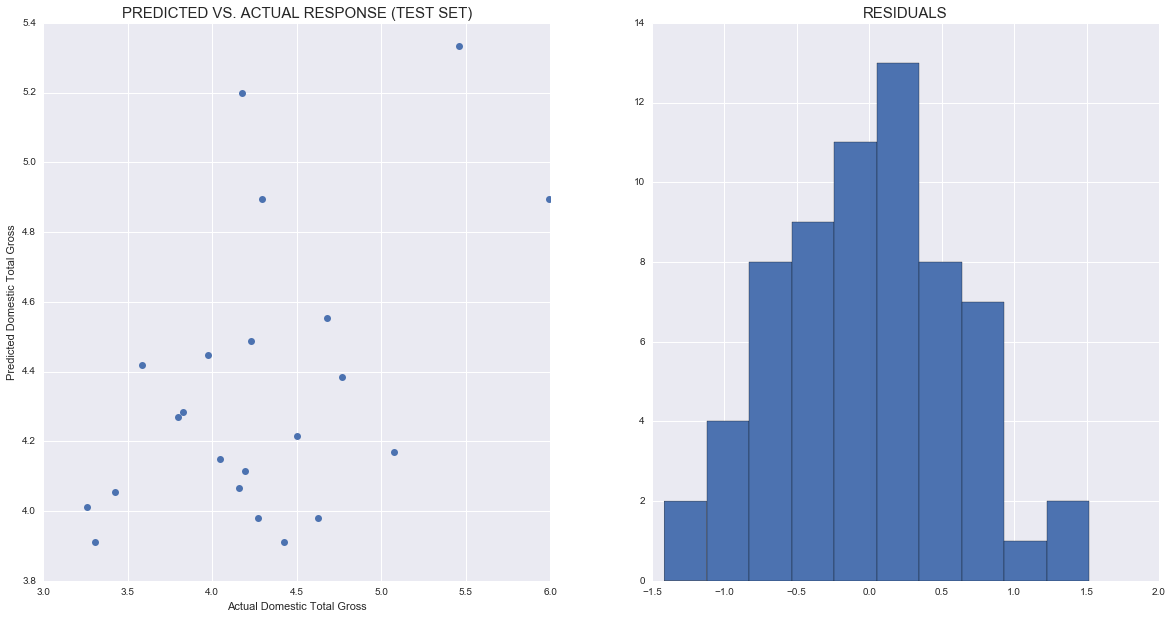

In [300]:
# test set predictions vs test set actuals

y_test_pred = fit.predict(X_test)
resid = fit.resid

plt.figure(figsize = (20, 10))

# plot of predicted vs actual response (using test set)
plt.subplot(1,2,1)
plt.title('PREDICTED VS. ACTUAL RESPONSE (TEST SET)', fontsize = 15)
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.plot(y_test, y_test_pred, 'o')

# plot histogram of residuals
plt.subplot(1,2,2)
plt.title('RESIDUALS', fontsize = 15)
plt.hist(resid);

The model performed slightly better in the training set than in the test set (training set adjusted R^2 of 0.296 vs test set RidgeCV score of 0.228), which is expected.

The plot of predicted vs actual values shows a slight improvement in the heteroscedasticity. The histogram of residuals also shows a nearly normal distribution of residuals, which means that the model mostly satisfies the OLS assumptions.